In [ ]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti aray 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Meeting 23/AirPassengers.csv')

In [ ]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data.head

<bound method NDFrame.head of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [ ]:
data.shape

(144, 2)

In [ ]:
data.columns

Index(['Month', '#Passengers'], dtype='object')

In [ ]:
data.info

<bound method DataFrame.info of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

In [ ]:
# Pada kolom Month, ubah tipe data menjadi datetime
data['Month']=pd.to_datetime(data['Month'], infer_datetime_format=True)

# Cek tipe data 
print (data.dtypes)

Month          datetime64[ns]
#Passengers             int64
dtype: object


In [ ]:
# Set kolom 'Month' sebagai index
data=data.set_index(['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
# Summary statistics pada variabel '#Passengers'
print (data.describe().T)
print ('Month')

# Pembulatan decimal 2 angka di belakang koma
print(data.describe().T.round(2))

             count        mean         std    min    25%    50%    75%    max
#Passengers  144.0  280.298611  119.966317  104.0  180.0  265.5  360.5  622.0
Month
             count   mean     std    min    25%    50%    75%    max
#Passengers  144.0  280.3  119.97  104.0  180.0  265.5  360.5  622.0


In [ ]:
data.isnull().sum()

#Passengers    0
dtype: int64

###4 Data Analysis

* Untuk memulai data analysis, kita perlu mengeksplor data terlebih dahulu melalui visualisasi ke dalam bentuk grafik (Time series plot).

* Tujuan dari time Series plot untuk memudahkan kita menemukan pattern atau pola dan temuan yang tidak biasa (unusual observations) dari dataset AirPassenger

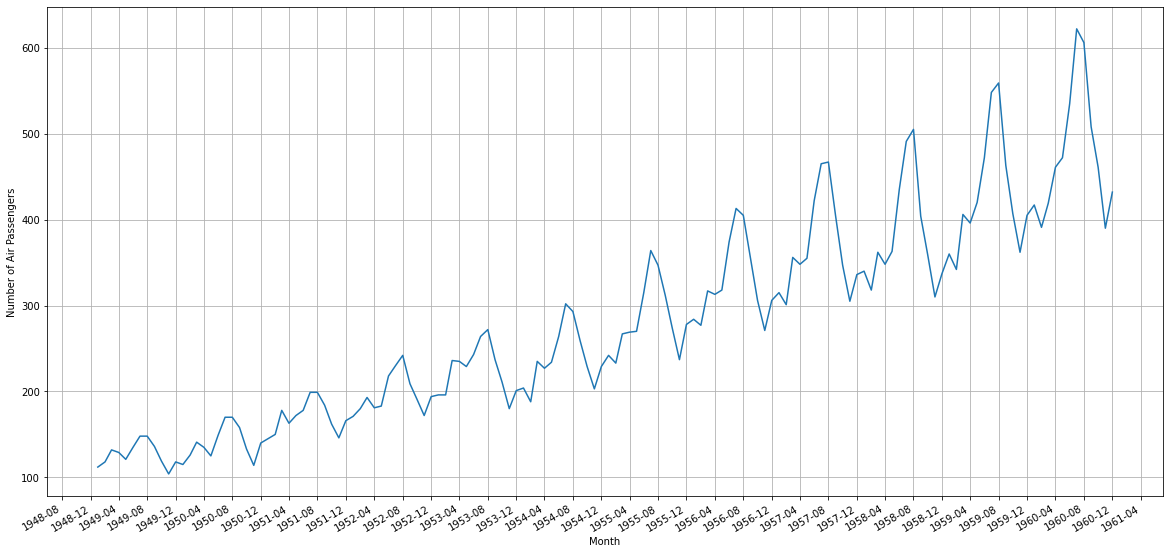

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Month")
plty.ylabel("Number of Air Passengers")

half_year_locator = mdates.MonthLocator(interval = 4)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(data)
fig.autofmt_xdate()
plty.grid()
plty.show()

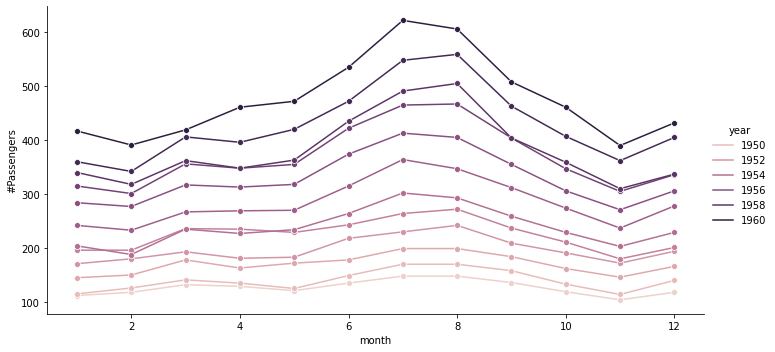

In [ ]:
# Seasonal plot 

data2 = data.reset_index()
data2['year'] = pd.DatetimeIndex(data2['Month']).year
data2['month'] = pd.DatetimeIndex(data2['Month']).month

# parameter hue digunakan untuk menampilkan multiple line chart berdasarkan tahun ('year')
sns.relplot (kind = 'line', data = data2, x = 'month', y = '#Passengers', hue = 'year', aspect = 2, marker='o' )

In [ ]:
# rolling dengan interval window sebesar 12 bulan dan hitung rata-rata
rolmean=data.rolling(window=12).mean()  

# rolling dengan interval window sebesar 12 bulan dan hitung st. deviasi
rolstd=data.rolling(window=12).std() 

# Tampilkan 15 baris pertama dari hasil rolling mean
print('15 baris pertama rolling mean: ')
print(rolmean.head(15))                
print ('')

# Tampilkan 15 baris pertama dari hasil rolling st. deviasi
print('15 baris pertama std. deviasi: ')
print(rolstd.head(15))            

15 baris pertama rolling mean: 
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333

15 baris pertama std. deviasi: 
            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    13.720147
1950-01-01    13.453342
1950-02-01    13.166475
1950-03-01    13.686977


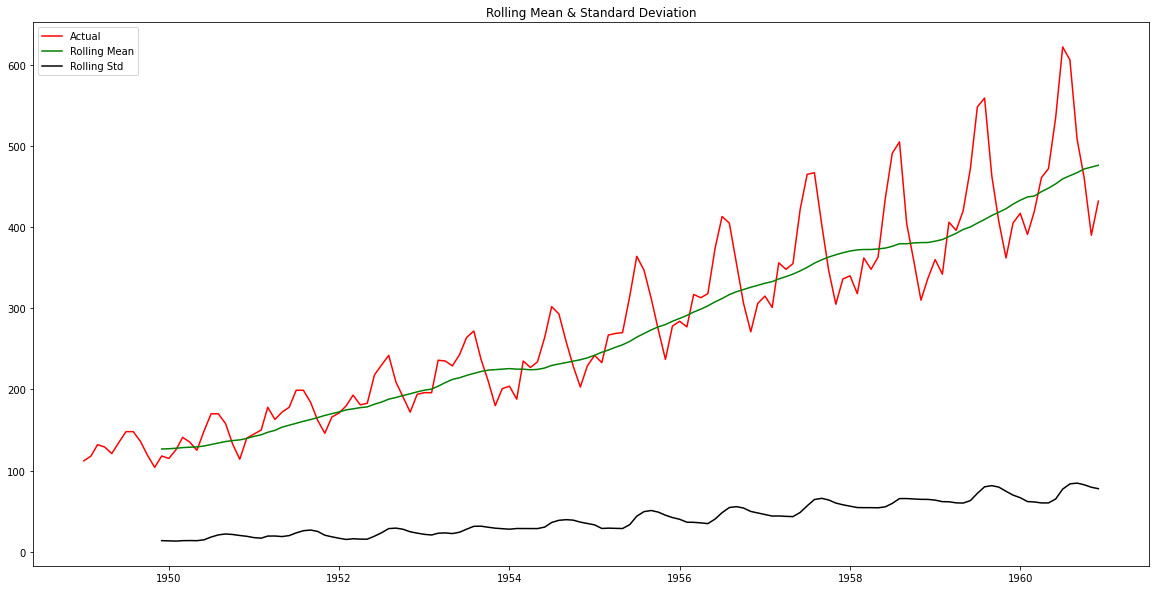

In [ ]:
# atur ukuran chart
plt.figure(figsize=(20,10))

# buat multiple line chart berdasarkan warna dan label
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')

# tampilkan legend, judul dari chart, dan panggil function untuk menampilkan chart
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


#### 4.3 Stationarity Check - Augmented Dickey-Fuller (ADF) test

* Selanjutnya, kita akan gunakan ADF test untuk uji stasioner dimana: 

  **H0:** *The time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.*

 **H1:** *The time series is stationary.*

* Jika p-value test kurang dari significance level (contoh alpha = 0.05) dan nilai ADF test lebih kecil dibandingkan critical values maka kita dapat reject null hypothesis dan dapat menyimpulkan bahwa time series adalah stasioner.

In [ ]:
# menggunakan function adfuller() yang diterapkan pada variable #Passengers
print('Dickey-Fuller Test: ')
dftest=adfuller(data['#Passengers'], autolag='AIC')
dftest


Dickey-Fuller Test: 


(0.8153688792060472,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [ ]:
# Supaya hasil uji lebih nyaman dibaca, maka kita buat series berdasarkan index 
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])

# Gunakan for loop untuk menaruh value dari dictionary dengan function items()
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print('Dickey-Fuller Test: ')
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


> **Insights:**

Nilai ADF statistic yang jauh lebih besar dari critical values pada semua level, dan juga p-value yang lebih besar dari 0.05 turut menandakan, **kita gagal menolak null hypothesis pada 90%, 95%, dan 99% tingkat keyakinan**, yang **mengindikasikan** bahwa **data time series ini strongly non-stationary.**

* Berdasarkan insights di atas, maka kita akan mencoba menstabilkan variance dengan cara log transformation pada data AirPassenger dengan ``` np.log() ```



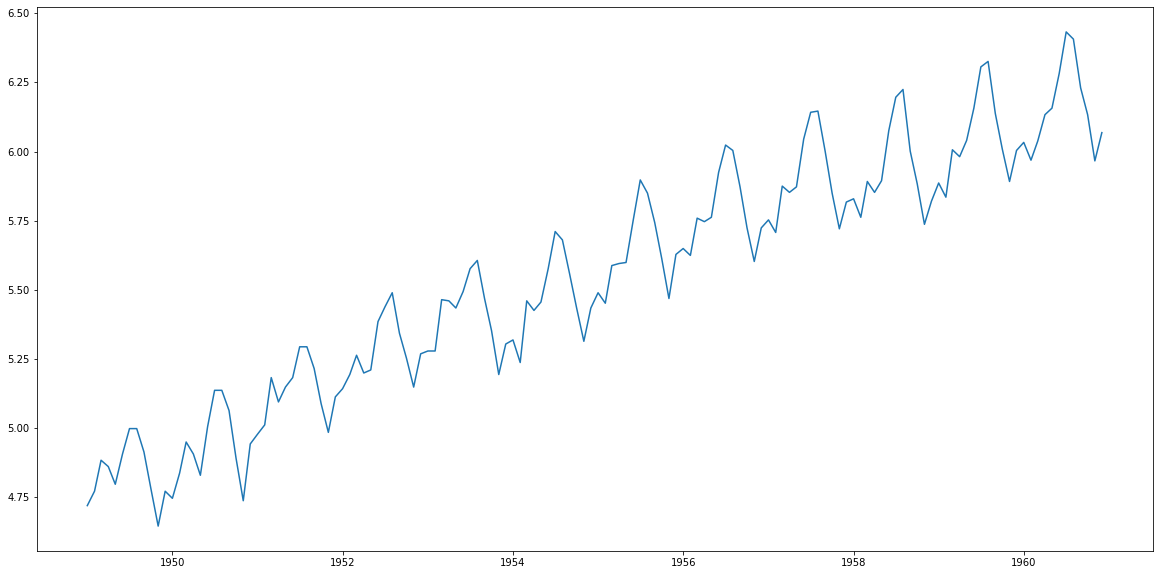

In [ ]:
# Plot dalam bentuk visualisasi line chart dengan menggunakan function numpy np.log
plt.figure(figsize=(20,10))
data_log=np.log(data) 
plt.plot(data_log)

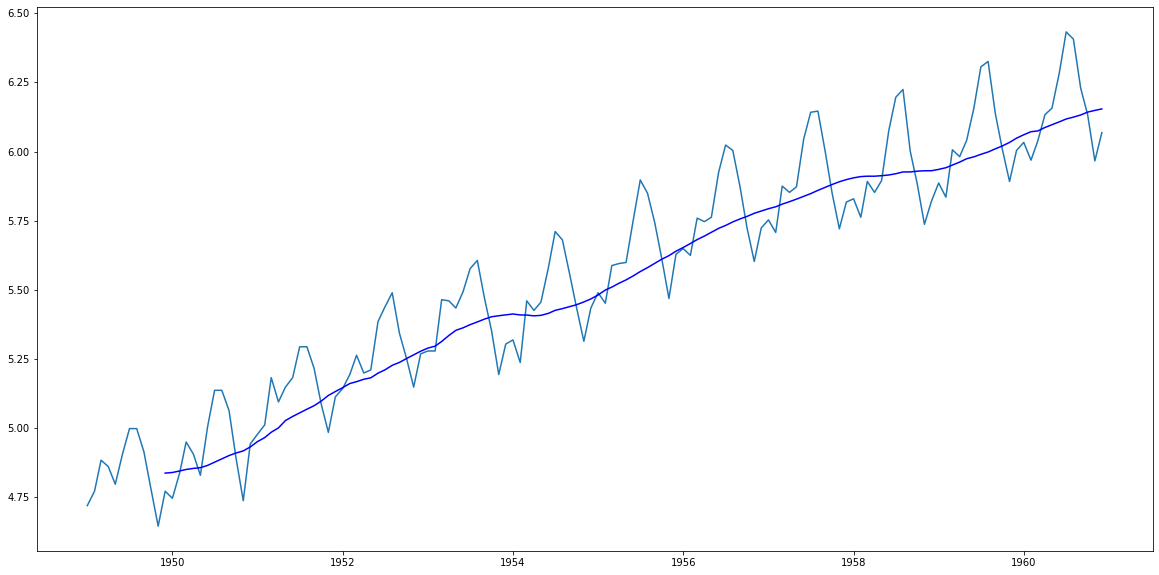

In [ ]:
# Cek secara visual kembali dengan plot data_log dengan rolling window mean dan std. deviation
plt.figure(figsize=(20,10))

MAvg=data_log.rolling(window=12).mean() 
MStd=data_log.rolling(window=12).std()

plt.plot(data_log)
plt.plot(MAvg, color='blue')
#plt.plot(MStd, color='red')

In [ ]:
# Hitung difference dari data_log dengan MAvg
data_log_diff=data_log-MAvg

# Tampilkan 12 baris teratas dari data_log_diff
data_log_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
# Efek dari rolling di atas, maka akan ada value NaN, sehingga kita bisa lakukan dropna()
data_log_diff=data_log_diff.dropna() 
data_log_diff.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
# Buat function stationarity untuk menampilkan multiple line chart dari actual, rolling mean, dan rolling std.deviasi
# yang juga berisikan hasil tes dari Dickey-Fuller

def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
  

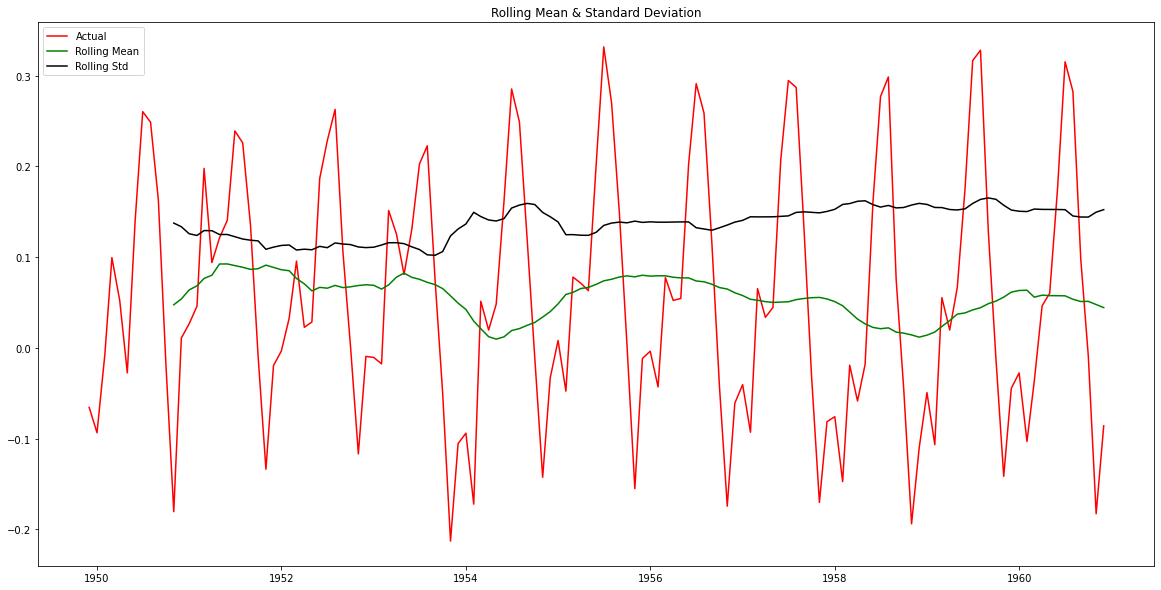

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Obs              119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


In [ ]:
# panggil function dan terapkan pada data_log_diff
stationarity(data_log_diff)

> **Insights:**

* Dapat dilihat dari hasil Dickey-Fuller test ini, bahwa untuk tingkat keyakinan 5% dan 10% sudah menunjukkan series ini stasioner dimana p-value 0.022235 yg < 0.05 menunjukkan bahwa kita menolak null hypothesis (reject to fail H0, accept H1), dan menyatakan bahwa series ini stasioner.

* Namun, karena `t-value (-3.162908) > DF critical value 1% (-3.486535)` maka, kita menerima null hypothesis (H0) yang menyatakan pada series ini tidak stasioner pd tingkat keyakinan 1% (*significance level* of 0.01). 

* Maka, kita dapat mencoba lagi dengan menggunakan Exponentially Weighted Moving Average (function `ewm`), karena melalui EWM kita dapat memberikan lebih banyak bobot kepada observasi terbaru, dengan kata lain dia akan memberikan bobot lebih sedikit terhadap data yang semakin jauh dari waktu kini, sehingga dia dapat menangkap tren terkini secara lebih cepat 

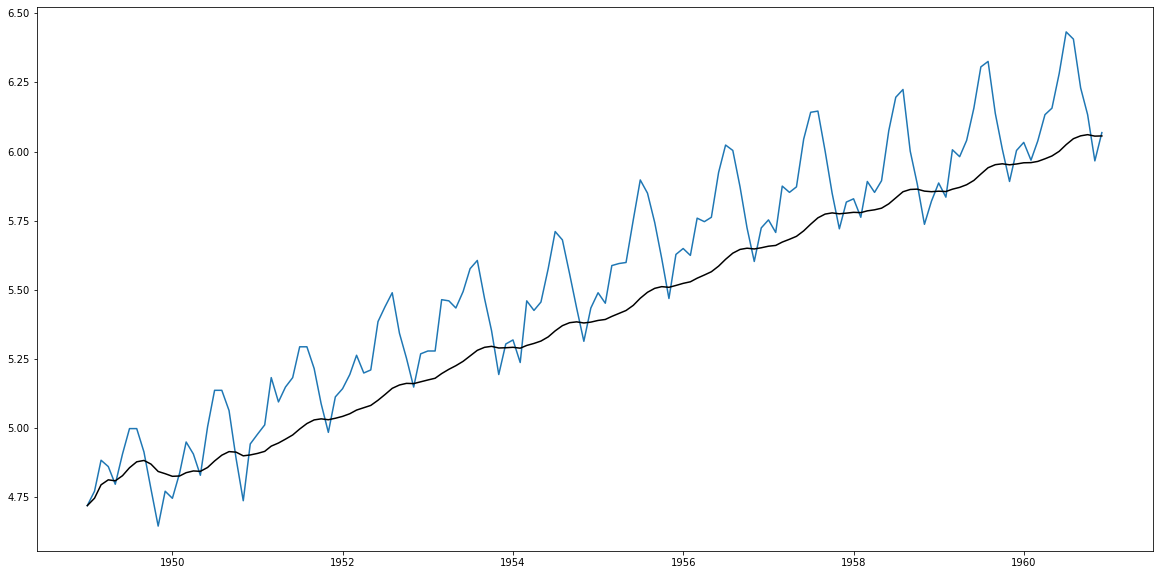

In [ ]:
# Visualisasikan ke dalam bentuk chart 
plt.figure(figsize=(20,10))

# Terapkan function ewm pada data_log melalui variable exp_data
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean() 

plt.plot(data_log)
plt.plot(exp_data, color='black')

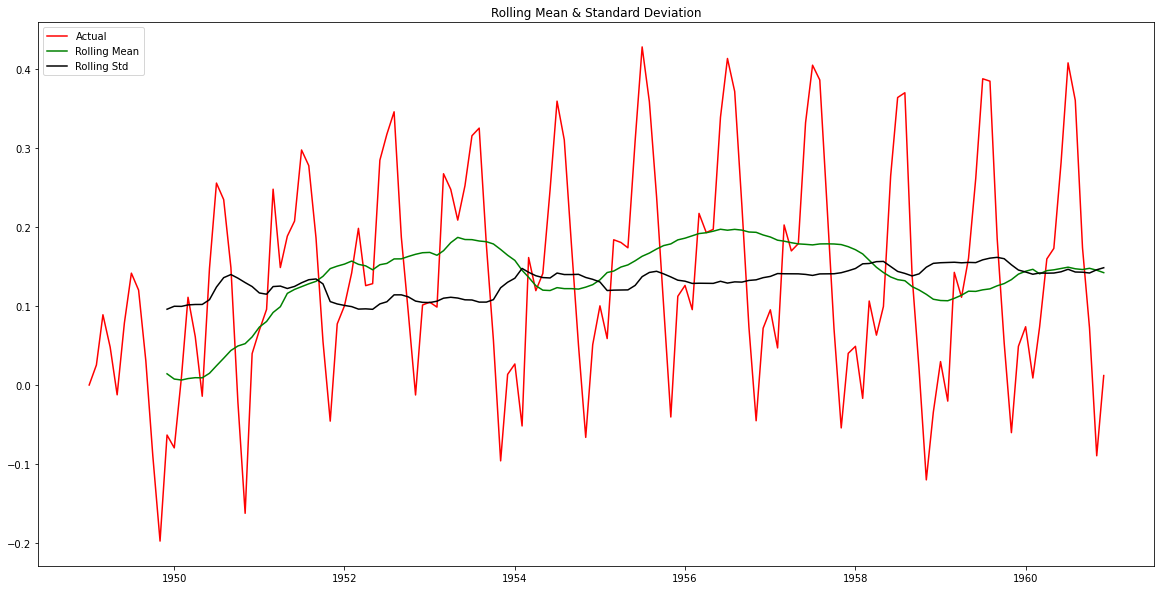

Dickey-Fuller Test: 
Test Statistic           -3.601262
p-value                   0.005737
Lags Used                13.000000
No. of Obs              130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


In [ ]:
# Hitung difference antara data_log dengan exp_data
exp_data_diff=data_log-exp_data

# Panggil function stationarity dan terapkan pada exp_data_diff
stationarity(exp_data_diff)

> **Insights:**

Sekarang, kita dapat melihat hasil melalui Dickey-Fuller test ini bahwa **nilai t-value (-3.601262) < DF critical value 1% (-3.481682)** maka kita dapat **reject null hypothesis**, dengan 90%, 95%, dan 99% tingkat keyakinan menyatakan bahwa series ini sudah stasioner.

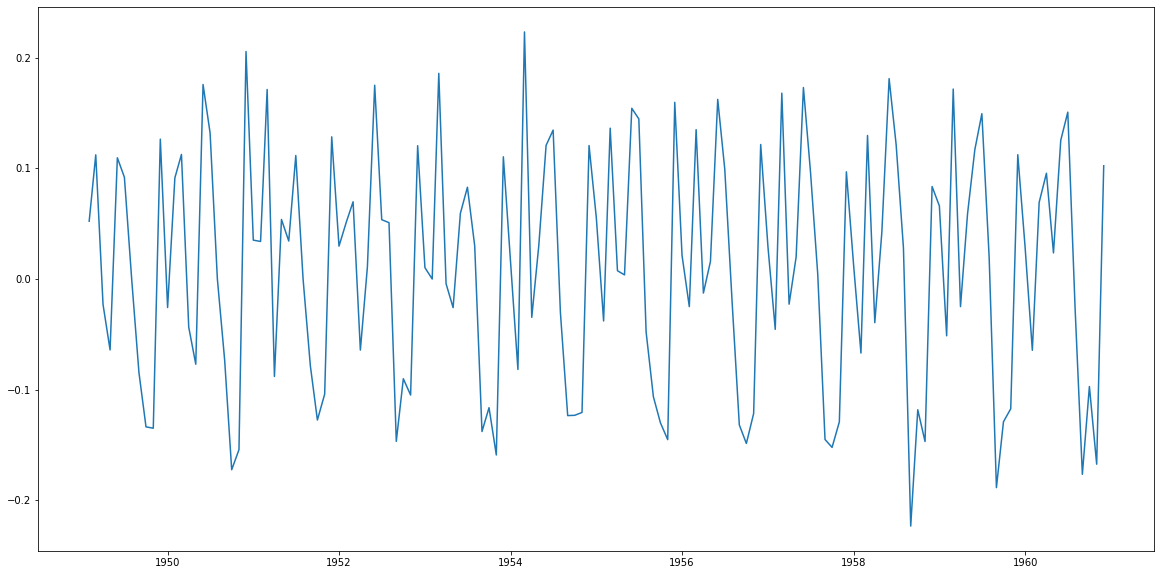

In [ ]:
# Buat format ukuran chart
plt.figure(figsize=(20,10))

# Terapkan shift terhadap data yang telah diterapkan transformasi log di cell sebelumnya
data_shift=data_log-data_log.shift() 

# Tampilkan chart
plt.plot(data_shift)

In [ ]:
# Check missing value
data_shift.isna().sum()

#Passengers    1
dtype: int64

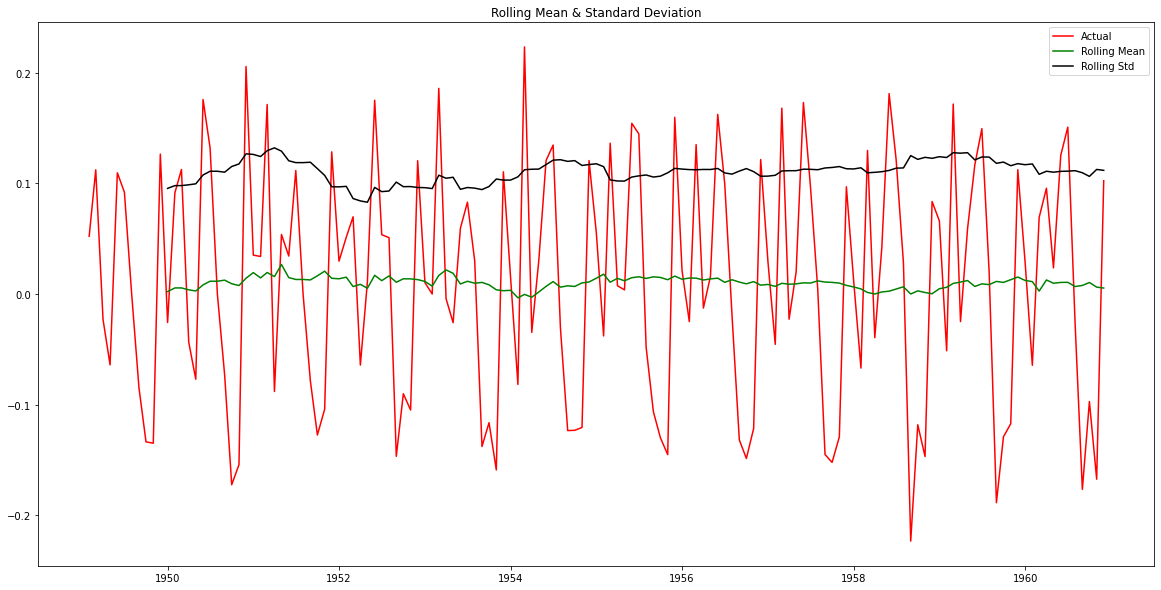

Dickey-Fuller Test: 
Test Statistic           -2.717131
p-value                   0.071121
Lags Used                14.000000
No. of Obs              128.000000
Critical Value (1%)      -3.482501
Critical Value (5%)      -2.884398
Critical Value (10%)     -2.578960
dtype: float64


In [ ]:
# Lakukan dropna 
data_shift=data_shift.dropna()

# Panggil function stationarity dan terapkan pada data_shift yang sudah dibersihkan dari NA value
stationarity(data_shift)

> **Insights:**

* Dari `data_shift` di atas, hasil ADF test menunjukkan bahwa p-value > 0.05 sehingga kita ***(failed to reject)*** gagal untuk menolak null hypothesis yang mengindikasikan bahwa series ini tidak stasioner. 

* Test statistic yang lebih besar dari Critical value pd 1% dan 5% juga menunjukkan hal demikian. Sehingga dalam observasi ini kita menyimpulkan bahwa series ini ***variant to time shift*** (mengalami perubahan pada pergeseran waktu)

#### 4.5 Decomposition and Autocorrelation Function

* Forecasting menggunakan data historikal dimana diurutkan dengan waktu, sehingga goal dari time series model yaitu untuk menemukan waktu dengan trend, seasonality, dan autocorrelation (correlation over time) lalu diformulasikan menjadi sebuah model.

* Teknik Decomposition ini digunakan untuk split data time series menjadi beberapa komponen yaitu trend, seasonality, dan noise (residual) components. 

* Setiap komponen dapat digunakan untuk menunjukkan pola (pattern) yang ada di dalam tiap kategori agar dapat menentukan apakah model Additive atau Multiplicative.

  * **Seasonality**: describes the periodic signal in your time series.
  * **Trend**: describes whether the time series is decreasing, constant, or increasing over time.
  * **Noise**: describes what remains behind the separation of seasonality and trend from the time series. In other words, it’s the variability in the data that cannot be explained by the model.


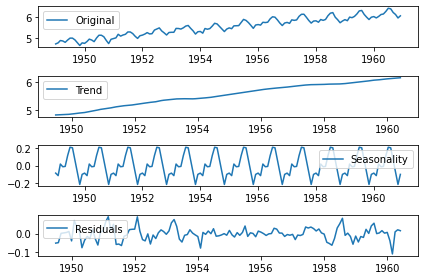

In [ ]:
# panggil function seasonal_decompose () dari statsmodels.tsa yang diterapkan di variabel data_log
decomp=seasonal_decompose(data_log)

# buat variabel trend, seasonal, residual yang sudah diterapkan
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

# Format gambar 
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

> **Insights:**

* Dari proses seasonal decompose, maka akan terbagi 
menjadi grafik original, trend (dalam hal ini dengan pola menaik), Seasonality (pola berulang yang terjadi dari tahun ke tahun), dan residuals (seberapa jauh titik data dari garis regresi).

* Dapat dilihat bahwa trend dari time series AirPassenger adalah semakin menaik, dan seasonality mengikuti pola. 

In [ ]:
# Tampilkan nilai dari tiap kategori dari 24 baris teratas
print("Trend \n",trend.head(24), '\n') # \n untuk menambahkan baris di akhir
print("Seasonal \n",seasonal.head(24), '\n')
print("Residual \n",residual.head(24), '\n')

Trend 
             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01     4.837280
1949-08-01     4.841114
1949-09-01     4.846596
1949-10-01     4.851238
1949-11-01     4.854488
1949-12-01     4.859954
1950-01-01     4.869840
1950-02-01     4.881389
1950-03-01     4.893411
1950-04-01     4.904293
1950-05-01     4.912752
1950-06-01     4.923701
1950-07-01     4.940483
1950-08-01     4.957406
1950-09-01     4.974380
1950-10-01     4.991942
1950-11-01     5.013095
1950-12-01     5.033804 

Seasonal 
             #Passengers
Month                  
1949-01-01    -0.085815
1949-02-01    -0.114413
1949-03-01     0.018113
1949-04-01    -0.013046
1949-05-01    -0.008966
1949-06-01     0.115393
1949-07-01     0.210816
1949-08-01     0.204512
1949-09-01     0.064836
1949-10-01    -0.075271
1949-11-01    -0.215846
1949-12-01    -0.100315
1950-01-01    -0.08

> **Insights:**

Dari data residual, kita dapat melihat banyak NA value, maka kita lakukan dropna

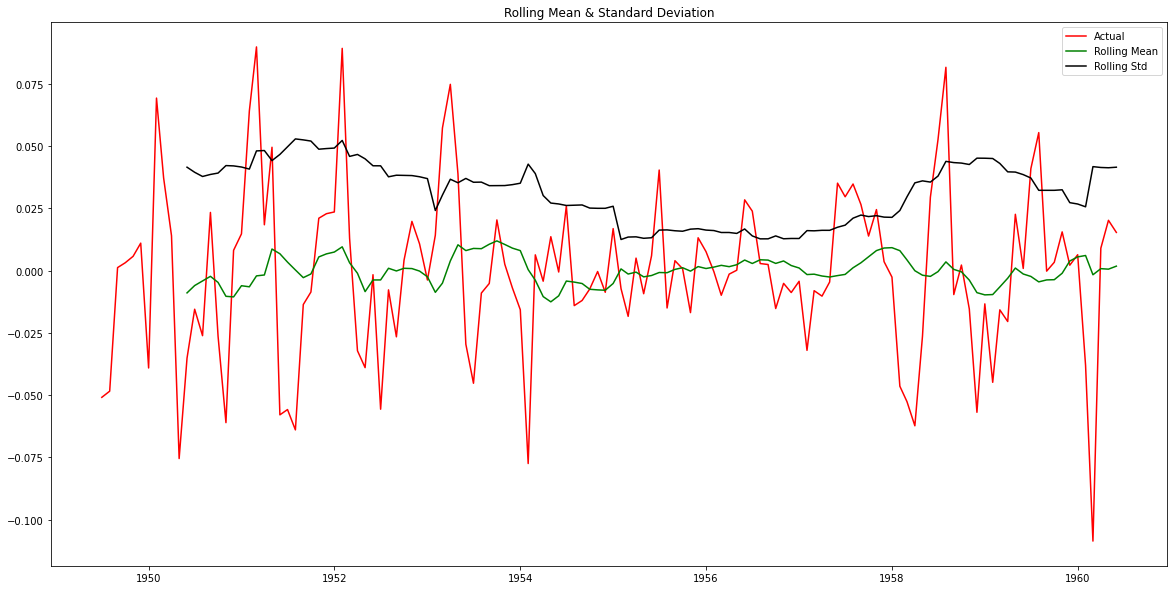

Dickey-Fuller Test: 
Test Statistic         -6.332387e+00
p-value                 2.885059e-08
Lags Used               9.000000e+00
No. of Obs              1.220000e+02
Critical Value (1%)    -3.485122e+00
Critical Value (5%)    -2.885538e+00
Critical Value (10%)   -2.579569e+00
dtype: float64


In [ ]:
decomp_data=residual

decomp_data=decomp_data.dropna()

stationarity(decomp_data)

> **Insights:**

Dari komponen data residual, hasil ADF test menunjukkan bahwa bahwa nilai Test statistic yg jauh lebih kecil daripada critical value pd berbagai tingkat keyakinan. Dan p-value yang jauh lebih kecil dari 0.05, kita dapat menyatakan bahwa series ini cukup kuat stasioner.

**Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)**

* Selanjutnya cara lain untuk melakukan tes stasioner adalah dengan menggunakan ACF dan PACF.

* Masih ingat dengan konsep sederhana Correlation yang sudah kita dipelajari di topik Statistik sebelummnya? Kedua function berdasarkan konsep dari Correlation.

* ACF merupakan korelasi antar data di dalam time series tersebut yang dipisahkan dalam lag dimana  (Xt , Xk+t) dengan k adalah jumlah lag dan t adalah nilainya.

* Sama halnya dengan ACF, PACF juga menghitung korelasi antar data di time series. Perbedaannya, PACF juga menghitung korelasi antara Xt dan Xt+k namun sebelumnya menghilangkan data antara Xt dan Xt+k terlebih dahulu. Berarti data yang dihilangkan adalah data  Xt+1 sampai dengan Xt+k-1



Text(0.5, 1.0, 'Partial Autocorrelation Function / PACF')

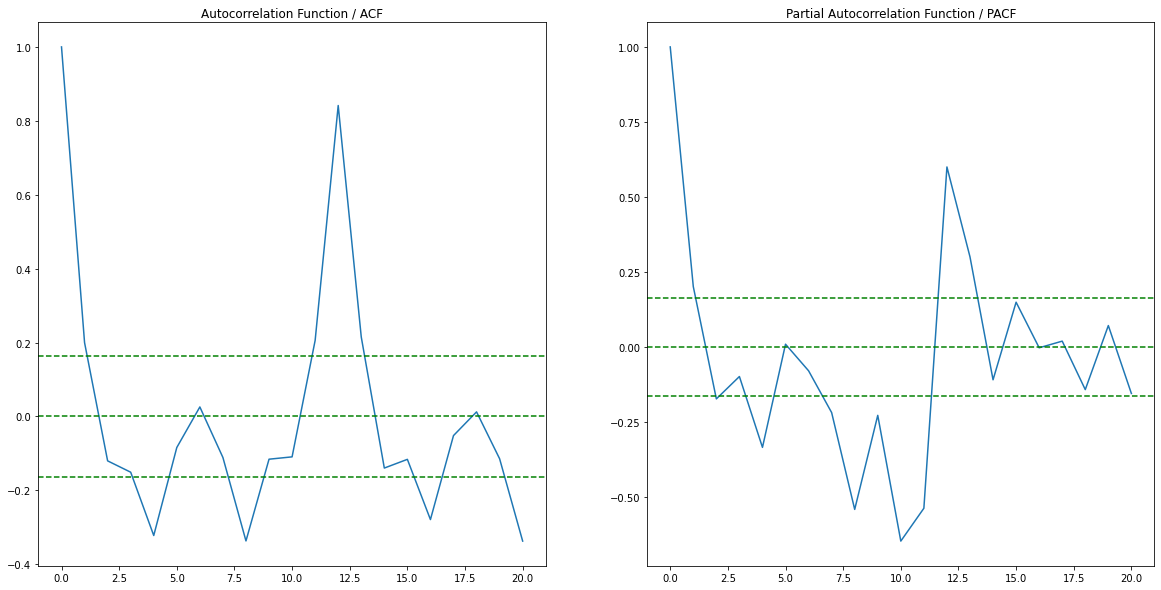

In [ ]:
# dari module time series analysis, import function acf dan pacf
# ACF = Auto Correlation Function
# PACF = Partial Auto Correlation Function
from statsmodels.tsa.stattools import acf, pacf 

# terapkan function acf dan pcf pada data_shift yang sudah dibuat
lag_acf=acf(data_shift, nlags=20)
lag_pacf=pacf(data_shift, nlags=20, method='ols')

# Format grafik dan visualisasikan ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Autocorrelation Function / ACF')

# Format grafik dan visualisasikan PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = -0.16
plt.axhline(y=1.96/np.sqrt(len(data_shift)),linestyle='--',color='green') # y = 0.16
plt.title('Partial Autocorrelation Function / PACF')

> **Interpretation:**

* Fungsi ACF dan PCF membantu kita dengan melakukan plot korelasi antara time series dan lag series tsb dengan 95% tingkat keyakinan ditandai dengan garis hijau putus-putus. 

* Jika nilai autocorrelation memotong/melewati garis putus-putus tersebut dapat diartikan bahwa specific lag tsb berkorelasi secara signifikan dengan time series yang ada. 

* Dari grafik di atas terlihat bahwa grafik time series (berwarna biru) berpotongan dengan grafik shift time series (dlm hal ini dengan lag=20) baik pada batas atas maupun bawah, sehingga dapat dikatakan bahwa grafik time series ini mengalami efek auto correlation. 

###5 Model Development

> Pada Model Development, kita akan mencoba menerapkan 2 model time series yaitu:
1. Holt-Winters
2. SARIMAX (pada dasarnya ini adalah ARIMA, yang memang spesifik untuk menghadapi seasonal effect seperti yg dialami oleh data yg sedang kita olah ini)


* Pisahkan data time series menjadi train dan test data




In [ ]:
# Split the data untuk 29 month test
train = data[0:int(len(data)*0.80)]   #train data sebesar 80%
test = data[int(len(data)*0.80):]     #test data sebesar 20%

#### **1. HoltWinters**

****

* Metode Holt-Winters adalah model dari time series behavior. Forecasting selalu memerlukan model, dan Holt-Winters adalah salah satu cara untuk modeling 3 aspek dari time series, yaitu : nilai rata-rata, slope dan seasonality

In [ ]:
model_data = ExponentialSmoothing(np.asarray(train['#Passengers']),seasonal_periods=24, trend='add',seasonal='mul').fit(optimized=True)

In [ ]:
#copy 29 bulan periode (1958-01 - 1960-12) untuk test dan assign ke data_Holt
data_Holt = test.copy() 

In [ ]:
data_Holt['Holt'] = model_data.forecast(len(test['#Passengers']))

In [ ]:
data_Holt.tail()

,#Passengers,Holt
Month,,
1960-08-01,606,546.655641
1960-09-01,508,478.965269
1960-10-01,461,416.433038
1960-11-01,390,366.724497
1960-12-01,432,414.671781


In [ ]:
#params untuk mengubah data pada variabel model_data menjadi sebuah dictionary
model_data.params 

{'damping_slope': nan,
 'initial_level': 201.97842725789653,
 'initial_seasons': array([0.55096983, 0.53290731, 0.6192745 , 0.60172077, 0.59931439,
        0.67766996, 0.74870749, 0.73734303, 0.64466839, 0.55665029,
        0.48125201, 0.53780726, 0.54093229, 0.51708956, 0.58747726,
        0.56299429, 0.57081701, 0.66759763, 0.73961046, 0.72426135,
        0.63148013, 0.54636817, 0.47882292, 0.53882092]),
 'initial_slope': 3.7035836567372806,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.8442995742563313,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 9.525739683887828e-38,
 'use_boxcox': False}

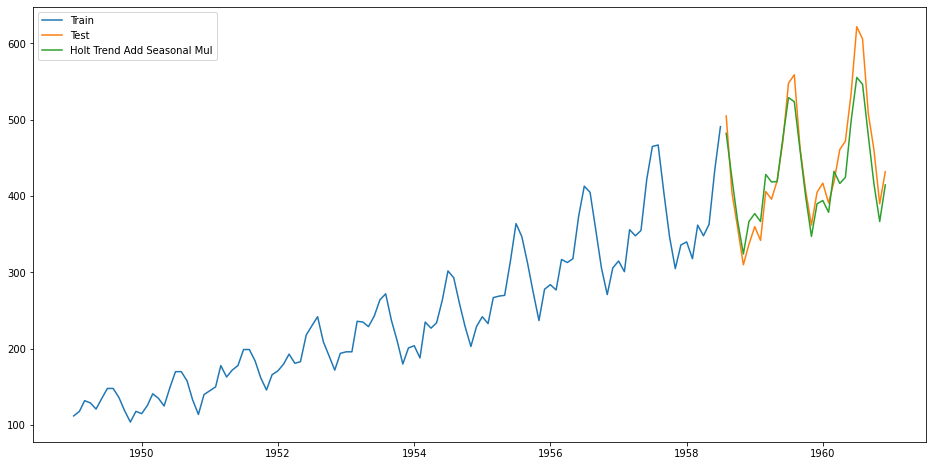

In [ ]:
# visualisasi hasil forecast dari model HoltWinters dengan data aktual
plt.figure(figsize=(16,8))
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(data_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)

> **Keterangan:**

* Dari grafik di atas terlihat bahwa model Holt-winters mulai melakukan prediksi pd 1958-08 s/d 1960-12 yang ditunjukkan oleh garis berwarna hijau. 

* Garis berwarna biru merupakan data yang digunakan untuk train dan garis berwarna oranye yang digunakan untuk test.